<a href="https://colab.research.google.com/github/aadi-kanwar/Neural-Network-Deep-Learning/blob/main/Exp_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow matplotlib

In [ ]:
!pip install tensorflow==2.17.0

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

## Step 2 : Load & Preprocess the data
Load the MNIST dataset and preprocess it.

In [8]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalise the images to a range of (0,1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Reshape the data to fit the model
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

## Step 3 : Build the Neural Network model
Create a simple convolutional neural network.

In [9]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Step 4: Compile the Model
Compile the model with an appropriate optimizer, loss function, & metric

In [10]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Step 5: Train the Model
Fit the model to the training data

In [11]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.8632 - loss: 0.4705 - val_accuracy: 0.9768 - val_loss: 0.0761
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.9808 - loss: 0.0614 - val_accuracy: 0.9834 - val_loss: 0.0549
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 47ms/step - accuracy: 0.9874 - loss: 0.0397 - val_accuracy: 0.9837 - val_loss: 0.0524
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 37s 49ms/step - accuracy: 0.9894 - loss: 0.0333 - val_accuracy: 0.9893 - val_loss: 0.0400
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.9915 - loss: 0.0248 - val_accuracy: 0.9886 - val_loss: 0.0389


## Step 6: Evaluate the Model


In [12]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9856 - loss: 0.0388
Test accuracy: 0.9894999861717224


## Step 7: Visualization
Plot the training and validation accuracy & loss.

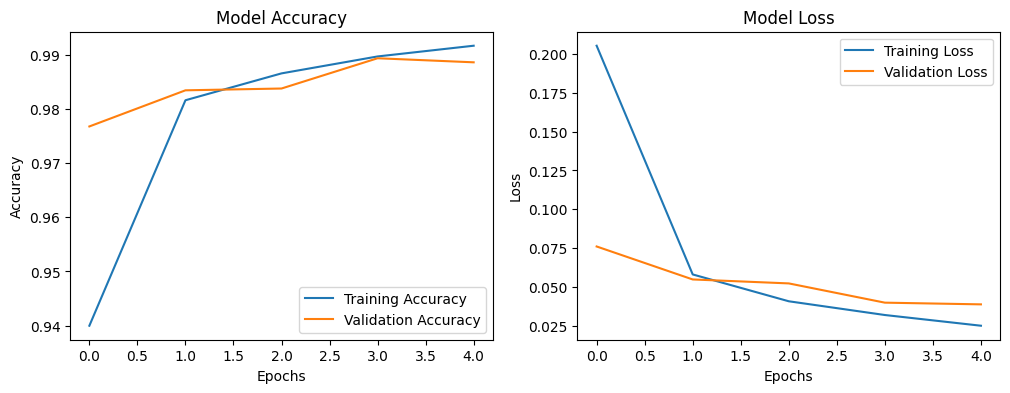

In [21]:
# Plot training & validation accuracy values
plt.figure(figsize = (12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training and validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()

## Step 8: Make Predictions
(Optional)
You can make predictions and visualise some results

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step


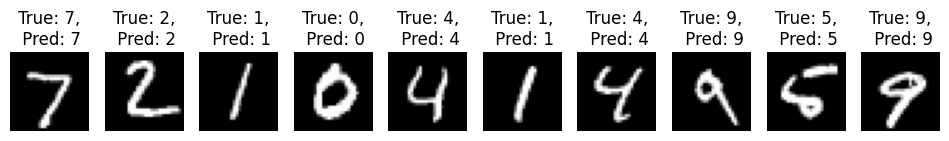

In [27]:
predictions = model.predict(x_test)

# Visualize same predictions
n = 10
plt.figure(figsize=(12, 6))
for i in range(n):
    plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_test[i].argmax()},\n Pred: {predictions[i].argmax()}")
    plt.axis('off')
plt.show()